# Pandas Cheatsheet


- [Pandas Cheatsheet](#pandas-cheatsheet)
  - [Getting started](#getting-started)
    - [Load Pandas](#load-pandas)
    - [Series](#series)
      - [Creating a Series](#creating-a-series)
      - [Series attributes](#series-attributes)
    - [Dataframe](#dataframe)
      - [Creating a Dataframe](#creating-a-dataframe)
      - [Dataframe attributes](#dataframe-attributes)
    - [Index and Multiindex](#index-and-multiindex)
  - [Read and write data from external files](03_pandas_cheatsheet.ipynb#read-and-write-data-from-external-files)
    - [from .csv](03_pandas_cheatsheet.ipynb#from-csv)
    - [from .xlsx](03_pandas_cheatsheet.ipynb#from-xlsx)
    - [from url](03_pandas_cheatsheet.ipynb#from-url)
    - [Data summary](03_pandas_cheatsheet.ipynb#data-summary)
    - [Data export](03_pandas_cheatsheet.ipynb#data-export)
  - [Select a subset of a DataFrame](#select-a-subset-of-a-dataframe)
    - [Select rows](#select-rows)
      - [using `.head()` / `.tail()`](#using-head-tail)
      - [using `.iloc[]`](#using-iloc)
      - [using `.loc[]`](#using-loc)
    - [Select columns](#select-columns)
      - [using `[]`](#using)
      - [using `.iloc[]`](#using-iloc-1)
      - [using `.loc[]`](#using-loc-1)
    - [Select specific rows and columns](#select-specific-rows-and-columns)
      - [using `.iloc[]`](#using-iloc-2)
      - [using `.loc[]`](#using-loc-2)
      - [using boolean masks](#using-boolean-masks)
      - [using `query()`](#using-query)
    - [Select with Multiindex](#select-with-multiindex)
  - [Data cleaning](#data-cleaning)
    - [Renaming columns](#renaming-columns)
    - [Changing index](#changing-index)
    - [Changing dtypes](#changing-dtypes)
    - [Adding/removing rows or columns](#addingremoving-rows-or-columns)
    - [Handling missing values](#handling-missing-values)
    - [Replacing values](#replacing-values)
  - [Data manipulation](#data-manipulation)
    - [Mathematical operations](#mathematical-operations)
    - [String operations](#string-operations)
    - [Applying custom functions](#applying-custom-functions)
    - [Sorting and ordering](#sorting-and-ordering)
    - [Grouping by category](#grouping-by-category)
    - [Comparing DataFrames](#comparing-dataframes)
    - [Combining dataframes](#combining-dataframes)
      - [concatenate](#concatenate)
      - [join and merge](#join-and-merge)
    - [Reshaping a dataframe](#reshaping-a-dataframe)
      - [explode](#explode)
      - [pivot](#pivot)
      - [melt](#melt)
      - [stacking / unstacking](#stacking-unstacking)
  - [Visualization](#visualization)
    - [Basic plotting](#basic-plotting)
    - [Other plots](#other-plots)
  - [Credits](#credits)


## Getting started


### Load Pandas


In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.__version__

'2.2.3'

### Series


#### Creating a Series


A Pandas `Series` is like a NumPy array but with labels. They are strictly 1-dimensional and can contain any data type (integers, strings, floats, objects, etc), including a mix of them.

![pandas Series](./img/pd_series.png)


`Series` can be created from a list, a scalar, a dictionary or a numpy array


In [3]:
lst = [-5, 1.3, 21, 6, 3]

my_series = pd.Series(data=lst, index=["a", "b", "c", "d", "e"], name="My numbers")
my_series

a    -5.0
b     1.3
c    21.0
d     6.0
e     3.0
Name: My numbers, dtype: float64

In [4]:
scalar = 3.141

my_series = pd.Series(data=scalar, index=["a", "b", "c"])
my_series

a    3.141
b    3.141
c    3.141
dtype: float64

In [5]:
population_dct = {
    "California": 38332521,
    "Texas": 26448193,
    "New York": 19651127,
    "Florida": 19552860,
    "Illinois": 12882135,
}

my_series = pd.Series(data=population_dct, name="Population")
my_series

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: Population, dtype: int64

In [6]:
ndarray = np.random.randint(0, 100, 6)

my_series = pd.Series(data=ndarray, name="random numbers")
my_series

0    11
1    18
2    64
3    32
4    18
5    66
Name: random numbers, dtype: int64

#### Series attributes


In [7]:
my_series.values

array([11, 18, 64, 32, 18, 66])

In [8]:
my_series.index

RangeIndex(start=0, stop=6, step=1)

In [9]:
my_series.name

'random numbers'

In [10]:
my_series = my_series.rename("another_name")
my_series

0    11
1    18
2    64
3    32
4    18
5    66
Name: another_name, dtype: int64

### Dataframe


Pandas `DataFrames` are like Excel spreadsheets. They are essentially `Series` stuck together and labeled.

![pandas Dataframe](./img/pd_dataframe.png)


#### Creating a Dataframe


In [11]:
dct = {"A": [1, 2, 3], "B": [11, 12, 13]}

df = pd.DataFrame(data=dct)
df

,A,B
0,1,11
1,2,12
2,3,13


In [12]:
nested_lst = [["A", 1, 10], ["B", 2, 11], ["C", 3, 12]]

df = pd.DataFrame(data=nested_lst, index=["R1", "R2", "R3"], columns=["C1", "C2", "C3"])
df

,C1,C2,C3
R1,A,1,10
R2,B,2,11
R3,C,3,12


In [13]:
ndarray_2d = np.random.randint(0, 100, (3, 3))

df = pd.DataFrame(
    data=ndarray_2d,
    index=["R1", "R2", "R3"],
    columns=["C1", "C2", "C3"],
)
df

,C1,C2,C3
R1,8,81,71
R2,68,17,64
R3,77,21,40


In [14]:
dct = [["A", 1, 10], ["B", 2, 11], ["C", 3, 12]]

df = pd.DataFrame(data=nested_lst, index=["R1", "R2", "R3"], columns=["C1", "C2", "C3"])
df

,C1,C2,C3
R1,A,1,10
R2,B,2,11
R3,C,3,12


In [15]:
# a column of the DataFrame is a Series
df["C1"]

R1    A
R2    B
R3    C
Name: C1, dtype: object

#### Dataframe attributes


In [16]:
df.values

array([['A', 1, 10],
       ['B', 2, 11],
       ['C', 3, 12]], dtype=object)

In [17]:
df.index

Index(['R1', 'R2', 'R3'], dtype='object')

In [18]:
df.columns

Index(['C1', 'C2', 'C3'], dtype='object')

In [19]:
# # a DataFrame does not have a name, so this line returns an error
# df.name

In [20]:
# columns can have different data types
df.dtypes

C1    object
C2     int64
C3     int64
dtype: object

### Index and Multiindex

`Series` and `DataFrame` objects contain an explicit `Index` that lets you reference and modify data. It can be thought of either as an immutable array or as an ordered set


In [21]:
df.index

Index(['R1', 'R2', 'R3'], dtype='object')

In [22]:
# columns are also an Index object
df.columns

Index(['C1', 'C2', 'C3'], dtype='object')

Similarly to Python's built-in `set` data structure, unions, intersections, differences, and other combinations of indices can be computed.


In [23]:
idx1 = pd.Index([1, 3, 5, 7, 9])
idx2 = pd.Index([2, 3, 5, 7, 11])

idx1.intersection(idx2)

Index([3, 5, 7], dtype='int64')

In [24]:
idx1.union(idx2)

Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [25]:
idx1.difference(idx2)

Index([1, 9], dtype='int64')

Hierarchichal indices (or `MultiIndex`) can also be created. There are several methods to do this:

- from a list of arrays, using `MultiIndex.from_arrays()`
- from an array of tuples, using `MultiIndex.from_tuples()`
- from a crossed set of iterables, using `MultiIndex.from_product()`
- from a DataFrame, using `MultiIndex.from_frame()`

See https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#hierarchical-indexing-multiindex for more information


In [26]:
# Create a MultiIndex from years and months
years = [2020, 2021, 2022]
months = ["Jan", "Feb", "Mar"]

midx = pd.MultiIndex.from_product([years, months], names=["Year", "Month"])
midx

MultiIndex([(2020, 'Jan'),
            (2020, 'Feb'),
            (2020, 'Mar'),
            (2021, 'Jan'),
            (2021, 'Feb'),
            (2021, 'Mar'),
            (2022, 'Jan'),
            (2022, 'Feb'),
            (2022, 'Mar')],
           names=['Year', 'Month'])

In [27]:
midx.get_level_values(level=1)

Index(['Jan', 'Feb', 'Mar', 'Jan', 'Feb', 'Mar', 'Jan', 'Feb', 'Mar'], dtype='object', name='Month')

In [28]:
# Create a DataFrame using the MultiIndex
data = np.random.randint(100, size=(len(midx), 2))
df = pd.DataFrame(data, index=midx, columns=["Value1", "Value2"])
df

Value1  Value2
Year Month                
2020 Jan        93       6
     Feb        80       3
     Mar        89      19
2021 Jan         2      49
     Feb        64      58
     Mar        97       8
2022 Jan        32       7
     Feb        66      68
     Mar        10      61

## Read and write data from external files


![Read and write files](./img/pd_read_write_files.png)


### from .csv


In [29]:
df = pd.read_csv("data/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### from .xlsx


In [30]:
# pandas.read_excel() requires the openpyxl package
# pip install openpyxl # https://pypi.org/project/openpyxl/
# OR conda install openpyxl  # https://anaconda.org/anaconda/openpyxl
df = pd.read_excel(
    io="data/titanic.xlsx",
    sheet_name="data sheet",
    index_col=0,
    skiprows=1,
)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### from url


In [31]:
# raw dataset from https://github.com/pandas-dev/pandas/blob/main/doc/data/titanic.csv
url = "https://raw.githubusercontent.com/pandas-dev/pandas/refs/heads/main/doc/data/titanic.csv"
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Data summary


Make sure to always have a check on the data after reading in the data.


In [32]:
df.shape

(891, 12)

In [33]:
# The info() method provides technical information about a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
# The describe() method provides a quick overview of the numerical data in a DataFrame.
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data export


In [35]:
# export the DataFrame to a CSV / excel file / clipboard
df.to_csv("data/titanic_copy.csv")
df.to_excel("data/titanic_copy.xlsx", sheet_name="data sheet", index=False)
df.to_clipboard()

## Select a subset of a DataFrame


### Select rows

![select rows](./img/pd_select_rows.png)


#### using `.head()` / `.tail()`


In [36]:
df.head(10)  # show the first n rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [37]:
df.tail(3)  # show the last n rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### using `.iloc[]`

`.iloc` takes **integers** (representing the position)


In [38]:
df.iloc[2]  # returns a series

PassengerId                        3
Survived                           1
Pclass                             3
Name           Heikkinen, Miss Laina
Sex                           female
Age                             26.0
SibSp                              0
Parch                              0
Ticket              STON/O2. 3101282
Fare                           7.925
Cabin                            NaN
Embarked                           S
Name: 2, dtype: object

In [39]:
df.iloc[0:2]  # slicing returns a dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


#### using `.loc[]`

`.loc` accepts **labels** as references


In [40]:
df.loc[2]  # select the rows whose index is labeled 2
# this would not work if the index was a string

PassengerId                        3
Survived                           1
Pclass                             3
Name           Heikkinen, Miss Laina
Sex                           female
Age                             26.0
SibSp                              0
Parch                              0
Ticket              STON/O2. 3101282
Fare                           7.925
Cabin                            NaN
Embarked                           S
Name: 2, dtype: object

### Select columns

![select columns](./img/pd_select_columns.png)


#### using `[]`


In [41]:
df["Age"]  # returns a Series

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [42]:
df[["Age"]]  # returns a DataFrame

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [43]:
# Select multiple columns using []
df[["Name", "Age"]]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss Margaret Edith",19.0
888,"Johnston, Miss Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",26.0


#### using `.iloc[]`


In [44]:
df.iloc[:, 3]  # returns the indexed object

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                          Graham, Miss Margaret Edith
888              Johnston, Miss Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

#### using `.loc[]`


In [45]:
df.loc[:, "Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                          Graham, Miss Margaret Edith
888              Johnston, Miss Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [46]:
df.loc[:, "Name":"Age"]  # slicing returns a DataFrame

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0
...,...,...,...
886,"Montvila, Rev. Juozas",male,27.0
887,"Graham, Miss Margaret Edith",female,19.0
888,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN
889,"Behr, Mr. Karl Howell",male,26.0


### Select specific rows and columns


![select rows and columns](./img/pd_select_rows_and_columns.png)


#### using `.iloc[]`


In [47]:
df.iloc[1, 3]  # returns the indexed object

'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

In [48]:
df.iloc[1:4, 3:6]  # returns the indexed object

,Name,Sex,Age
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0


In [49]:
# use np.r_ to select ranges and individual elements
rows = np.r_[0, 2, 4, 10:12]
cols = np.r_[3, 9, 2]
df.iloc[rows, cols]

,Name,Fare,Pclass
0,"Braund, Mr. Owen Harris",7.250,3
2,"Heikkinen, Miss Laina",7.925,3
4,"Allen, Mr. William Henry",8.050,3
10,"Sandstrom, Miss Marguerite Rut",16.700,3
11,"Bonnell, Miss Elizabeth",26.550,1


#### using `.loc[]`


In [50]:
df.loc[[0, 5], ["Name", "Fare"]]

,Name,Fare
0,"Braund, Mr. Owen Harris",7.2500
5,"Moran, Mr. James",8.4583


#### using boolean masks

boolean mask = conditional expression


In [51]:
# Get passengers with age less than 2
mask = df["Age"] < 2
df[mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
164,165,0,3,"Panula, Master Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
172,173,1,3,"Johnson, Miss Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
183,184,1,2,"Becker, Master Richard F",male,1.00,2,1,230136,39.0000,F4,S
305,306,1,1,"Allison, Master Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
381,382,1,3,"Nakid, Miss Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
386,387,0,3,"Goodwin, Master Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S
469,470,1,3,"Baclini, Miss Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master Viljo",male,0.67,1,1,250649,14.5000,NaN,S


In [52]:
# Get passengers from cabin class 2 and 3.
mask = df["Pclass"].isin([2, 3])
df[mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [53]:
# alternative way to filter cabin class 2 and 3
mask = (df["Pclass"] == 2) | (df["Pclass"] == 3)  # | is the OR operator
df[mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [54]:
# filter Female passenger from cabin class 1
mask = (df["Sex"] == "female") & (df["Pclass"] == 1)  # & is the AND operator
df[mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [55]:
# boolean indexing can be combined with .loc[]
df.loc[mask, ["Name"]]

,Name
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
11,"Bonnell, Miss Elizabeth"
31,"Spencer, Mrs. William Augustus (Marie Eugenie)"
52,"Harper, Mrs. Henry Sleeper (Myna Haxtun)"
...,...
856,"Wick, Mrs. George Dennick (Mary Hitchcock)"
862,"Swift, Mrs. Frederick Joel (Margaret Welles Ba..."
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)"
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)"


#### using `query()`


In [56]:
df.query("Sex == 'female' & Pclass == 1")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


### Select with Multiindex


In [57]:
years = [2020, 2021, 2022]
months = ["Jan", "Feb", "Mar"]
midx = pd.MultiIndex.from_product([years, months], names=["Year", "Month"])

multi_df = pd.DataFrame({"A": range(9), "B": range(100, 109)}, index=midx)
multi_df

A    B
Year Month        
2020 Jan    0  100
     Feb    1  101
     Mar    2  102
2021 Jan    3  103
     Feb    4  104
     Mar    5  105
2022 Jan    6  106
     Feb    7  107
     Mar    8  108

In [58]:
multi_df.loc[2020]

,A,B
Month,,
Jan,0,100
Feb,1,101
Mar,2,102


In [59]:
multi_df.loc[(2020, "Jan")]

A      0
B    100
Name: (2020, Jan), dtype: int64

In [60]:
multi_df.loc[[(2020, "Jan"), (2021, "Feb")]]

,,A,B
Year,Month,,
2020,Jan,0,100
2021,Feb,4,104


In [61]:
multi_df.loc[2020:2021]

A    B
Year Month        
2020 Jan    0  100
     Feb    1  101
     Mar    2  102
2021 Jan    3  103
     Feb    4  104
     Mar    5  105

In [62]:
# It is possible to perform quite complicated selections using pd.IndexSlice
idx = pd.IndexSlice
multi_df.loc[idx[:, "Jan"], "A"]

Year  Month
2020  Jan      0
2021  Jan      3
2022  Jan      6
Name: A, dtype: int64

In [63]:
multi_df.loc[idx[:, "Jan"], :]

,,A,B
Year,Month,,
2020,Jan,0,100
2021,Jan,3,103
2022,Jan,6,106


In [64]:
multi_df.loc[idx[:, ("Jan", "Feb")], :]

,,A,B
Year,Month,,
2020,Jan,0,100
2021,Jan,3,103
2022,Jan,6,106
2020,Feb,1,101
2021,Feb,4,104
2022,Feb,7,107


more information on selecting (= indexing) can be found here

- https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-choice
- and for MultiIndex: https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#basic-indexing-on-axis-with-multiindex


## Data cleaning


### Renaming columns


In [65]:
df = pd.read_csv("data/titanic.csv")

renaming_dct = {
    "SibSp": "Nb_siblings_or_spouses_aboard",
    "Parch": "Nb_parents_or_children_aboard",
}

df.rename(columns=renaming_dct)  # Beware, changes are not saved

,PassengerId,Survived,Pclass,Name,Sex,Age,Nb_siblings_or_spouses_aboard,Nb_parents_or_children_aboard,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [66]:
# # to make permanent changes, use either of the following options:
# # option 1
# df.rename(columns=renaming_dct, inplace=True)
# Option 2
df = df.rename(columns=renaming_dct)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Nb_siblings_or_spouses_aboard,Nb_parents_or_children_aboard,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Changing index


In [67]:
df.set_index("Name")

,PassengerId,Survived,Pclass,Sex,Age,Nb_siblings_or_spouses_aboard,Nb_parents_or_children_aboard,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
"Graham, Miss Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [68]:
# # Similarly, to make permanent changes, use either of the following methods:
# # option 1
# df.set_index("Name", inplace=True)
# Option 2
df = df.set_index("Name")
df

,PassengerId,Survived,Pclass,Sex,Age,Nb_siblings_or_spouses_aboard,Nb_parents_or_children_aboard,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
"Graham, Miss Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [69]:
df = df.reset_index(drop=False)
df

,Name,PassengerId,Survived,Pclass,Sex,Age,Nb_siblings_or_spouses_aboard,Nb_parents_or_children_aboard,Ticket,Fare,Cabin,Embarked
0,"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,"Heikkinen, Miss Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,"Graham, Miss Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,"Johnston, Miss Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,"Behr, Mr. Karl Howell",890,1,1,male,26.0,0,0,111369,30.0000,C148,C


### Changing dtypes


In [70]:
df["Survived"] = df["Survived"].astype(bool)
df

,Name,PassengerId,Survived,Pclass,Sex,Age,Nb_siblings_or_spouses_aboard,Nb_parents_or_children_aboard,Ticket,Fare,Cabin,Embarked
0,"Braund, Mr. Owen Harris",1,False,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,True,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,"Heikkinen, Miss Laina",3,True,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,True,1,female,35.0,1,0,113803,53.1000,C123,S
4,"Allen, Mr. William Henry",5,False,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",887,False,2,male,27.0,0,0,211536,13.0000,NaN,S
887,"Graham, Miss Margaret Edith",888,True,1,female,19.0,0,0,112053,30.0000,B42,S
888,"Johnston, Miss Catherine Helen ""Carrie""",889,False,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,"Behr, Mr. Karl Howell",890,True,1,male,26.0,0,0,111369,30.0000,C148,C


### Adding/removing rows or columns


In [71]:
df.drop(index=range(0, 5), columns="Cabin")

,Name,PassengerId,Survived,Pclass,Sex,Age,Nb_siblings_or_spouses_aboard,Nb_parents_or_children_aboard,Ticket,Fare,Embarked
5,"Moran, Mr. James",6,False,3,male,NaN,0,0,330877,8.4583,Q
6,"McCarthy, Mr. Timothy J",7,False,1,male,54.0,0,0,17463,51.8625,S
7,"Palsson, Master Gosta Leonard",8,False,3,male,2.0,3,1,349909,21.0750,S
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,True,3,female,27.0,0,2,347742,11.1333,S
9,"Nasser, Mrs. Nicholas (Adele Achem)",10,True,2,female,14.0,1,0,237736,30.0708,C
...,...,...,...,...,...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",887,False,2,male,27.0,0,0,211536,13.0000,S
887,"Graham, Miss Margaret Edith",888,True,1,female,19.0,0,0,112053,30.0000,S
888,"Johnston, Miss Catherine Helen ""Carrie""",889,False,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,"Behr, Mr. Karl Howell",890,True,1,male,26.0,0,0,111369,30.0000,C


In [72]:
# Adding a column

df["Fare_Euros"] = df["Fare"] * 12 * 1.18
# pre_1970_GBP_to_modern_GBP = 12
# modern_GBP_to_euro = 1.18
df

,Name,PassengerId,Survived,Pclass,Sex,Age,Nb_siblings_or_spouses_aboard,Nb_parents_or_children_aboard,Ticket,Fare,Cabin,Embarked,Fare_Euros
0,"Braund, Mr. Owen Harris",1,False,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,102.660000
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,True,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1009.371528
2,"Heikkinen, Miss Laina",3,True,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,112.218000
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,True,1,female,35.0,1,0,113803,53.1000,C123,S,751.896000
4,"Allen, Mr. William Henry",5,False,3,male,35.0,0,0,373450,8.0500,NaN,S,113.988000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",887,False,2,male,27.0,0,0,211536,13.0000,NaN,S,184.080000
887,"Graham, Miss Margaret Edith",888,True,1,female,19.0,0,0,112053,30.0000,B42,S,424.800000
888,"Johnston, Miss Catherine Helen ""Carrie""",889,False,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,332.052000
889,"Behr, Mr. Karl Howell",890,True,1,male,26.0,0,0,111369,30.0000,C148,C,424.800000


### Handling missing values

Missing values are typically denoted with `NaN`


In [73]:
# use `df.isnull()` to find missing values
df.isnull()

,Name,PassengerId,Survived,Pclass,Sex,Age,Nb_siblings_or_spouses_aboard,Nb_parents_or_children_aboard,Ticket,Fare,Cabin,Embarked,Fare_Euros
0,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False


In [74]:
# check which rows have missing values
df.isnull().any(axis=1)

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Length: 891, dtype: bool

In [75]:
df["Cabin"].fillna("")  # Replace NaN values with an empty string

0          
1       C85
2          
3      C123
4          
       ... 
886        
887     B42
888        
889    C148
890        
Name: Cabin, Length: 891, dtype: object

In [76]:
# remove rows with missing values
df.dropna()

,Name,PassengerId,Survived,Pclass,Sex,Age,Nb_siblings_or_spouses_aboard,Nb_parents_or_children_aboard,Ticket,Fare,Cabin,Embarked,Fare_Euros
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,True,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1009.371528
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,True,1,female,35.0,1,0,113803,53.1000,C123,S,751.896000
6,"McCarthy, Mr. Timothy J",7,False,1,male,54.0,0,0,17463,51.8625,E46,S,734.373000
10,"Sandstrom, Miss Marguerite Rut",11,True,3,female,4.0,1,1,PP 9549,16.7000,G6,S,236.472000
11,"Bonnell, Miss Elizabeth",12,True,1,female,58.0,0,0,113783,26.5500,C103,S,375.948000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",872,True,1,female,47.0,1,1,11751,52.5542,D35,S,744.167472
872,"Carlsson, Mr. Frans Olof",873,False,1,male,33.0,0,0,695,5.0000,B51 B53 B55,S,70.800000
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",880,True,1,female,56.0,0,1,11767,83.1583,C50,C,1177.521528
887,"Graham, Miss Margaret Edith",888,True,1,female,19.0,0,0,112053,30.0000,B42,S,424.800000


### Replacing values


In [77]:
df.loc[:4, "Cabin"] = "ZZ_1000"
df.head()

,Name,PassengerId,Survived,Pclass,Sex,Age,Nb_siblings_or_spouses_aboard,Nb_parents_or_children_aboard,Ticket,Fare,Cabin,Embarked,Fare_Euros
0,"Braund, Mr. Owen Harris",1,False,3,male,22.0,1,0,A/5 21171,7.2500,ZZ_1000,S,102.660000
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,True,1,female,38.0,1,0,PC 17599,71.2833,ZZ_1000,C,1009.371528
2,"Heikkinen, Miss Laina",3,True,3,female,26.0,0,0,STON/O2. 3101282,7.9250,ZZ_1000,S,112.218000
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,True,1,female,35.0,1,0,113803,53.1000,ZZ_1000,S,751.896000
4,"Allen, Mr. William Henry",5,False,3,male,35.0,0,0,373450,8.0500,ZZ_1000,S,113.988000


In [78]:
df["Embarked"].replace("C", "Cherbourg")

0              S
1      Cherbourg
2              S
3              S
4              S
         ...    
886            S
887            S
888            S
889    Cherbourg
890            Q
Name: Embarked, Length: 891, dtype: object

In [79]:
port_of_embarkation = {"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"}
# Option 1
df["Embarked"].replace(port_of_embarkation)
# Option 2
df["Embarked"].map(port_of_embarkation)

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: Embarked, Length: 891, dtype: object

## Data manipulation


### Mathematical operations


In [80]:
df[["Age", "Fare_Euros"]].mean()  # mean, median, min, std, sum, count, cumsum, cumprod

Age            29.699118
Fare_Euros    456.011585
dtype: float64

In [81]:
# the agg() method can be used to apply multiple functions at once
df[["Age", "Fare_Euros"]].agg(["min", "mean", "max"])

,Age,Fare_Euros
min,0.420000,0.000000
mean,29.699118,456.011585
max,80.000000,7254.581472


In [82]:
# unique values in a column
df["Pclass"].unique()

array([3, 1, 2])

In [83]:
# counting values
df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [84]:
# apply a function to each element of a column
np.exp(df["Fare"])

0      1.408105e+03
1      9.077031e+30
2      2.765564e+03
3      1.150898e+23
4      3.133795e+03
           ...     
886    4.424134e+05
887    1.068647e+13
888    1.528289e+10
889    1.068647e+13
890    2.321572e+03
Name: Fare, Length: 891, dtype: float64

### String operations


In [85]:
mask = df["Name"].str.contains("john william", case=False)
df[mask]

,Name,PassengerId,Survived,Pclass,Sex,Age,Nb_siblings_or_spouses_aboard,Nb_parents_or_children_aboard,Ticket,Fare,Cabin,Embarked,Fare_Euros
165,"Goldsmith, Master Frank John William ""Frankie""",166,True,3,male,9.0,0,2,363291,20.525,NaN,S,290.634
864,"Gill, Mr. John William",865,False,2,male,24.0,0,0,233866,13.000,NaN,S,184.080


In [86]:
df["Name"].str.len()

0      23
1      51
2      21
3      44
4      24
       ..
886    21
887    27
888    39
889    21
890    19
Name: Name, Length: 891, dtype: int64

In [87]:
splited_names = df["Name"].str.split(pat=",")
splited_names

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                               [Heikkinen,  Miss Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
886                             [Montvila,  Rev. Juozas]
887                       [Graham,  Miss Margaret Edith]
888           [Johnston,  Miss Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object

In [88]:
# Assign the first element of the list to the "Family Name" column
# and the second element to the "First Name" column
df[["Family Name", "First Name"]] = splited_names.to_list()
df

,Name,PassengerId,Survived,Pclass,Sex,Age,Nb_siblings_or_spouses_aboard,Nb_parents_or_children_aboard,Ticket,Fare,Cabin,Embarked,Fare_Euros,Family Name,First Name
0,"Braund, Mr. Owen Harris",1,False,3,male,22.0,1,0,A/5 21171,7.2500,ZZ_1000,S,102.660000,Braund,Mr. Owen Harris
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,True,1,female,38.0,1,0,PC 17599,71.2833,ZZ_1000,C,1009.371528,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,"Heikkinen, Miss Laina",3,True,3,female,26.0,0,0,STON/O2. 3101282,7.9250,ZZ_1000,S,112.218000,Heikkinen,Miss Laina
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,True,1,female,35.0,1,0,113803,53.1000,ZZ_1000,S,751.896000,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,"Allen, Mr. William Henry",5,False,3,male,35.0,0,0,373450,8.0500,ZZ_1000,S,113.988000,Allen,Mr. William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",887,False,2,male,27.0,0,0,211536,13.0000,NaN,S,184.080000,Montvila,Rev. Juozas
887,"Graham, Miss Margaret Edith",888,True,1,female,19.0,0,0,112053,30.0000,B42,S,424.800000,Graham,Miss Margaret Edith
888,"Johnston, Miss Catherine Helen ""Carrie""",889,False,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,332.052000,Johnston,"Miss Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell",890,True,1,male,26.0,0,0,111369,30.0000,C148,C,424.800000,Behr,Mr. Karl Howell


### Applying custom functions

- `df.apply()`, applies a function along an axis of the DataFrame.
- `df.map()`, applies a function element-wise


In [89]:
def total_family_fare(row):
    family_size = (
        row["Nb_siblings_or_spouses_aboard"] + row["Nb_parents_or_children_aboard"] + 1
    )  # Including the passenger
    return row["Fare_Euros"] * family_size


df.apply(total_family_fare, axis=1)  # axis=1 --> apply function to each row

0       205.320000
1      2018.743056
2       112.218000
3      1503.792000
4       113.988000
          ...     
886     184.080000
887     424.800000
888    1328.208000
889     424.800000
890     109.740000
Length: 891, dtype: float64

In [90]:
def age_category(age):
    if age is np.nan:
        return "Unknown"
    elif age < 18:
        return "Child"
    elif age < 60:
        return "Adult"
    else:
        return "Senior"


# Apply the function to the 'Age' column
df["Age"].map(age_category)

0       Adult
1       Adult
2       Adult
3       Adult
4       Adult
        ...  
886     Adult
887     Adult
888    Senior
889     Adult
890     Adult
Name: Age, Length: 891, dtype: object

### Sorting and ordering


In [91]:
df.sort_index(ascending=False)

,Name,PassengerId,Survived,Pclass,Sex,Age,Nb_siblings_or_spouses_aboard,Nb_parents_or_children_aboard,Ticket,Fare,Cabin,Embarked,Fare_Euros,Family Name,First Name
890,"Dooley, Mr. Patrick",891,False,3,male,32.0,0,0,370376,7.7500,NaN,Q,109.740000,Dooley,Mr. Patrick
889,"Behr, Mr. Karl Howell",890,True,1,male,26.0,0,0,111369,30.0000,C148,C,424.800000,Behr,Mr. Karl Howell
888,"Johnston, Miss Catherine Helen ""Carrie""",889,False,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,332.052000,Johnston,"Miss Catherine Helen ""Carrie"""
887,"Graham, Miss Margaret Edith",888,True,1,female,19.0,0,0,112053,30.0000,B42,S,424.800000,Graham,Miss Margaret Edith
886,"Montvila, Rev. Juozas",887,False,2,male,27.0,0,0,211536,13.0000,NaN,S,184.080000,Montvila,Rev. Juozas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,"Allen, Mr. William Henry",5,False,3,male,35.0,0,0,373450,8.0500,ZZ_1000,S,113.988000,Allen,Mr. William Henry
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,True,1,female,35.0,1,0,113803,53.1000,ZZ_1000,S,751.896000,Futrelle,Mrs. Jacques Heath (Lily May Peel)
2,"Heikkinen, Miss Laina",3,True,3,female,26.0,0,0,STON/O2. 3101282,7.9250,ZZ_1000,S,112.218000,Heikkinen,Miss Laina
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,True,1,female,38.0,1,0,PC 17599,71.2833,ZZ_1000,C,1009.371528,Cumings,Mrs. John Bradley (Florence Briggs Thayer)


In [92]:
df.sort_values(by="Age", ascending=False)

,Name,PassengerId,Survived,Pclass,Sex,Age,Nb_siblings_or_spouses_aboard,Nb_parents_or_children_aboard,Ticket,Fare,Cabin,Embarked,Fare_Euros,Family Name,First Name
630,"Barkworth, Mr. Algernon Henry Wilson",631,True,1,male,80.0,0,0,27042,30.0000,A23,S,424.800000,Barkworth,Mr. Algernon Henry Wilson
851,"Svensson, Mr. Johan",852,False,3,male,74.0,0,0,347060,7.7750,NaN,S,110.094000,Svensson,Mr. Johan
493,"Artagaveytia, Mr. Ramon",494,False,1,male,71.0,0,0,PC 17609,49.5042,NaN,C,700.979472,Artagaveytia,Mr. Ramon
96,"Goldschmidt, Mr. George B",97,False,1,male,71.0,0,0,PC 17754,34.6542,A5,C,490.703472,Goldschmidt,Mr. George B
116,"Connors, Mr. Patrick",117,False,3,male,70.5,0,0,370369,7.7500,NaN,Q,109.740000,Connors,Mr. Patrick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,"Razi, Mr. Raihed",860,False,3,male,NaN,0,0,2629,7.2292,NaN,C,102.365472,Razi,Mr. Raihed
863,"Sage, Miss Dorothy Edith ""Dolly""",864,False,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S,984.828000,Sage,"Miss Dorothy Edith ""Dolly"""
868,"van Melkebeke, Mr. Philemon",869,False,3,male,NaN,0,0,345777,9.5000,NaN,S,134.520000,van Melkebeke,Mr. Philemon
878,"Laleff, Mr. Kristo",879,False,3,male,NaN,0,0,349217,7.8958,NaN,S,111.804528,Laleff,Mr. Kristo


In [93]:
df["Age"].nlargest(5)

630    80.0
851    74.0
96     71.0
493    71.0
116    70.5
Name: Age, dtype: float64

In [94]:
df["Age"].idxmax()  # idxmin, idxmax
# find the index of the max / min value

630

### Grouping by category


The `groupby` method is used to calculating a given statistic (e.g. `mean` age) for each category in a column (e.g. male/female in the `Sex` column). This fits in the more general `split-apply-combine` pattern:

- Split the data into groups
- Apply a function to each group independently
- Combine the results into a data structure

![split-apply-combine](./img/pd_split-apply-combine.png)


In [95]:
# What is the average age for male versus female passengers?
df.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [96]:
# What is the mean ticket fare price for each of the sex and cabin class combinations?
df.groupby(["Sex", "Pclass"])["Fare_Euros"].mean()

Sex     Pclass
female  1         1502.741298
        2          311.096914
        3          228.242346
male    1          951.921959
        2          279.543639
        3          179.288717
Name: Fare_Euros, dtype: float64

In [97]:
# What is the survival rate for each cabin class?
df.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [98]:
# What is the survival rate, the number of people who survived and the total number of passenger for each cabin class?
df.groupby("Pclass")["Survived"].agg(["mean", "sum", "count"])

,mean,sum,count
Pclass,,,
1,0.629630,136,216
2,0.472826,87,184
3,0.242363,119,491


more information on split-apply-combine / groupby can be found here:  
https://pandas.pydata.org/docs/user_guide/groupby.html


### Comparing DataFrames


In [99]:
df1 = pd.DataFrame({"A": [1, 2, np.nan], "B": [4, np.nan, 6]})
df2 = pd.DataFrame({"A": [1, 2, np.nan], "B": [4, np.nan, 6]})

# Be careful when using the `==` operator to compare DataFrames
# By definition, NaN (Not a Number) is not equal to any value, including itself.
# np.NaN != np.NaN
df1 == df2

,A,B
0,True,True
1,True,False
2,False,True


In [100]:
# df.equals() correctly handles NaN values
df1.compare(df2)

Empty DataFrame
Columns: []
Index: []

In [101]:
# However df.equals() does not protect against floating errors
df1 = pd.Series([0.1 + 0.2])
df2 = pd.Series([0.3])

df1.equals(df2)  # 0.1 + 0.2 != 0.3

False

In [102]:
# use np.isclose() or np.allclose() instead
# atol = precision, default is 1e-8
np.isclose(df1, df2, atol=1e-5)
np.allclose(df1, df2, atol=1e-5)

True

In [103]:
df1 = pd.DataFrame(
    {"col1": ["a", "a", "b", "b", "a"], "col2": [1.0, 2.0, 3.0, np.nan, 5.0], "col3": [1.0, 2.0, 3.0, 4.0, 5.0]},
)
df2 = pd.DataFrame(
    {"col1": ["X", "a", "b", "b", "a"], "col2": [1.0, 2.0, 3.0, np.nan, 5.0], "col3": [1.0, 2.0, 999, 4.0, 5.0]},
)
df1.compare(df2, keep_shape=False)

col1       col3       
  self other self  other
0    a     X  NaN    NaN
2  NaN   NaN  3.0  999.0

### Combining dataframes


#### concatenate

`pd.concat()`: Merge multiple Series or DataFrame objects along a shared index or column

![concatenate](./img/pd_concatenate.png)


In [104]:
a = pd.DataFrame({"C1": ["A", "B", "C"], "C2": [2.1, 4.3, -6.5]})
b1 = pd.DataFrame({"C1": ["E", "F"], "C2": [5.2, 0.5]})
b2 = pd.DataFrame({"C3": [23, 14, 64]})
b3 = pd.DataFrame({"C1": ["E", "F"]})

pd.concat([a, b2], axis=1)

,C1,C2,C3
0,A,2.1,23
1,B,4.3,14
2,C,-6.5,64


In [105]:
pd.concat([a, b1])  # by default, axis=0

,C1,C2
0,A,2.1
1,B,4.3
2,C,-6.5
0,E,5.2
1,F,0.5


In [106]:
pd.concat([a, b3])  # any blanks is filled in with NaN values

,C1,C2
0,A,2.1
1,B,4.3
2,C,-6.5
0,E,NaN
1,F,NaN


#### join and merge

`df.join()`: Merge multiple DataFrame objects along the index or a column

`pd.merge()`: Similar to `df.join()` but allows for more complex merging. See https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html for more information.

![join](./img/pd_join.png)


In [107]:
df1 = pd.DataFrame(
    {
        "name": ["Magneto", "Storm", "Mystique", "Batman", "Joker", "Catwoman", "Hellboy"],
        "alignment": ["bad", "good", "bad", "good", "bad", "bad", "good"],
        "gender": ["male", "female", "female", "male", "male", "female", "male"],
        "publisher": ["Marvel", "Marvel", "Marvel", "DC", "DC", "DC", "Dark Horse Comics"],
    }
)
df1

,name,alignment,gender,publisher
0,Magneto,bad,male,Marvel
1,Storm,good,female,Marvel
2,Mystique,bad,female,Marvel
3,Batman,good,male,DC
4,Joker,bad,male,DC
5,Catwoman,bad,female,DC
6,Hellboy,good,male,Dark Horse Comics


In [108]:
df2 = pd.DataFrame(
    {
        "publisher": ["DC", "Marvel", "Image"],
        "year_founded": [1934, 1939, 1992],
    }
)
df2

,publisher,year_founded
0,DC,1934
1,Marvel,1939
2,Image,1992


In [109]:
# how='inner': use the intersection of the axis values
# how='outer': use the union of all axis values
# how='left': use calling frame’s index (or column if on is specified)
# how='right': use other’s index.
pd.merge(df1, df2, how="inner", on="publisher")

,name,alignment,gender,publisher,year_founded
0,Magneto,bad,male,Marvel,1939
1,Storm,good,female,Marvel,1939
2,Mystique,bad,female,Marvel,1939
3,Batman,good,male,DC,1934
4,Joker,bad,male,DC,1934
5,Catwoman,bad,female,DC,1934


In [110]:
pd.merge(df1, df2, how="outer", on="publisher")

,name,alignment,gender,publisher,year_founded
0,Batman,good,male,DC,1934.0
1,Joker,bad,male,DC,1934.0
2,Catwoman,bad,female,DC,1934.0
3,Hellboy,good,male,Dark Horse Comics,NaN
4,NaN,NaN,NaN,Image,1992.0
5,Magneto,bad,male,Marvel,1939.0
6,Storm,good,female,Marvel,1939.0
7,Mystique,bad,female,Marvel,1939.0


### Reshaping a dataframe


#### explode

`df.explode()` is used to get rid of lists in the data


In [111]:
df = pd.DataFrame({"A": [[1, 2], "foo", [], ["a", "b"]], "B": [1, 2, 3, 4]})
df

,A,B
0,"[1, 2]",1
1,foo,2
2,[],3
3,"[a, b]",4


In [112]:
df.explode(column="A")  # new rows use the same index (use reset_index() to prevent this)

,A,B
0,1,1
0,2,1
1,foo,2
2,NaN,3
3,a,4
3,b,4


#### pivot

`df.pivot()` makes long data wide (pivoting the values of one column into multiple columns)

![pivot](./img/pd_pivot.png)


In [113]:
df1 = pd.DataFrame(
    {
        "date": pd.to_datetime(["2020-01-03", "2020-01-04", "2020-01-05"] * 4),
        "variable": ["A"] * 3 + ["B"] * 3 + ["C"] * 3 + ["D"] * 3,
        "value": range(12),
    }
)
df1

,date,variable,value
0,2020-01-03,A,0
1,2020-01-04,A,1
2,2020-01-05,A,2
3,2020-01-03,B,3
4,2020-01-04,B,4
5,2020-01-05,B,5
6,2020-01-03,C,6
7,2020-01-04,C,7
8,2020-01-05,C,8
9,2020-01-03,D,9


In [114]:
pivoted_df1 = df1.pivot(index="date", columns="variable", values="value")
pivoted_df1

variable,A,B,C,D
date,,,,
2020-01-03,0,3,6,9
2020-01-04,1,4,7,10
2020-01-05,2,5,8,11


There is also a `pd.pivot_table()` method that can handle more complex case (e.g. with multi-index).  
For more information, check https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html


#### melt

`df.melt()` makes wide data long (it can be thought of as an ‘unpivot)

![melt](./img/pd_melt.png)


In [115]:
pivoted_df1.reset_index().melt(id_vars=["date"], value_vars=["A", "B", "C", "D"])

,date,variable,value
0,2020-01-03,A,0
1,2020-01-04,A,1
2,2020-01-05,A,2
3,2020-01-03,B,3
4,2020-01-04,B,4
5,2020-01-05,B,5
6,2020-01-03,C,6
7,2020-01-04,C,7
8,2020-01-05,C,8
9,2020-01-03,D,9


#### stacking / unstacking

`df.stack()` takes a DataFrame of any size and ‘stacks’ the columns into a multi-index series


In [116]:
df = pd.DataFrame(
    {
        "A": [1, 2, 3, 4],
        "B": [5, 6, 7, 8],
        "C": [9, 10, 11, 12],
    }
)
df

,A,B,C
0,1,5,9
1,2,6,10
2,3,7,11
3,4,8,12


In [117]:
stacked_df = df.stack()  # the result is a Series with a MultiIndex
stacked_df

0  A     1
   B     5
   C     9
1  A     2
   B     6
   C    10
2  A     3
   B     7
   C    11
3  A     4
   B     8
   C    12
dtype: int64

In [118]:
df.stack().index

MultiIndex([(0, 'A'),
            (0, 'B'),
            (0, 'C'),
            (1, 'A'),
            (1, 'B'),
            (1, 'C'),
            (2, 'A'),
            (2, 'B'),
            (2, 'C'),
            (3, 'A'),
            (3, 'B'),
            (3, 'C')],
           )

Conversely, `df.unstack()` takes a multi-index DataFrame and unstacks it


In [119]:
stacked_df.unstack()

,A,B,C
0,1,5,9
1,2,6,10
2,3,7,11
3,4,8,12


## Visualization


### Basic plotting


<Axes: title={'center': 'Fare paid by passengers'}, xlabel='Passenger ID', ylabel='Fare'>

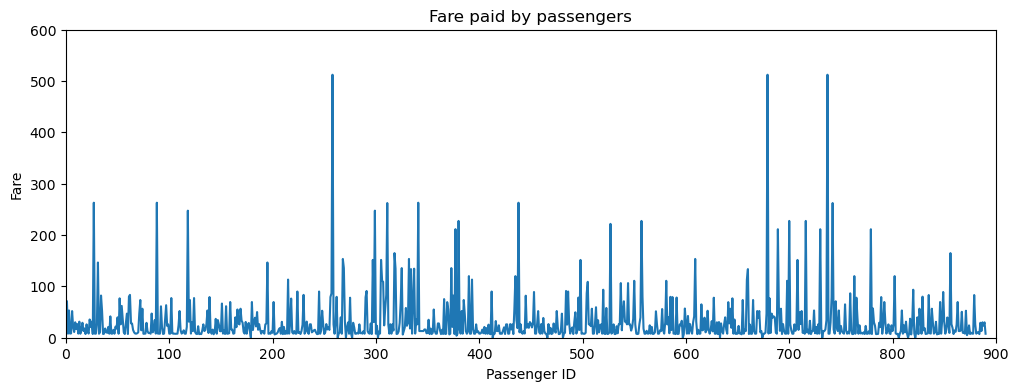

In [120]:
df = pd.read_csv("data/titanic.csv")

df["Fare"].plot(
    figsize=(12, 4),
    xlim=(0, 900),
    ylim=(0, 600),
    xlabel="Passenger ID",
    ylabel="Fare",
    title="Fare paid by passengers",
)

### Other plots

Plotting methods allow for a handful of plot styles other than the default line plot. These methods can be provided as the `kind` keyword argument to `plot()`, and include:

- ‘bar’ or ‘barh’ for bar plots
- ‘hist’ for histogram
- ‘box’ for boxplot
- ‘kde’ or ‘density’ for density plots
- ‘area’ for area plots
- ‘scatter’ for scatter plots
- ‘hexbin’ for hexagonal bin plots
- ‘pie’ for pie plots


<Axes: ylabel='Frequency'>

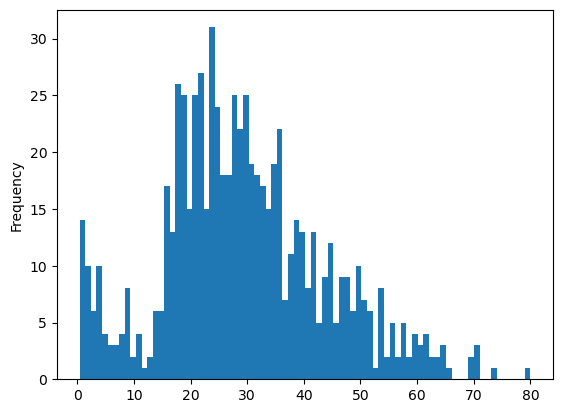

In [121]:
df["Age"].plot(kind="hist", bins=80)

array([<Axes: >, <Axes: >], dtype=object)

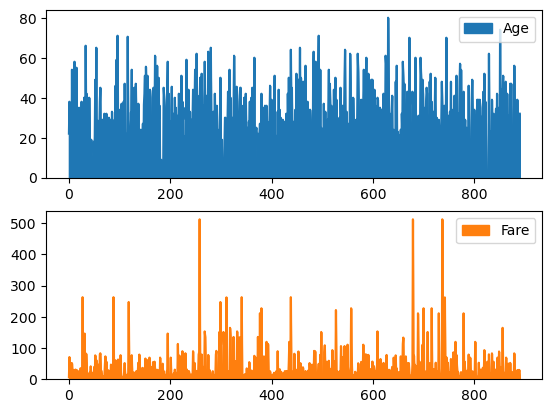

In [122]:
df[["Age", "Fare"]].plot(kind="area", subplots=True, sharex=False)

You can also create these other plots using the methods DataFrame.plot.<kind> instead of providing the `kind` keyword argument. This makes it easier to discover plot methods and the specific arguments they use:


<Axes: >

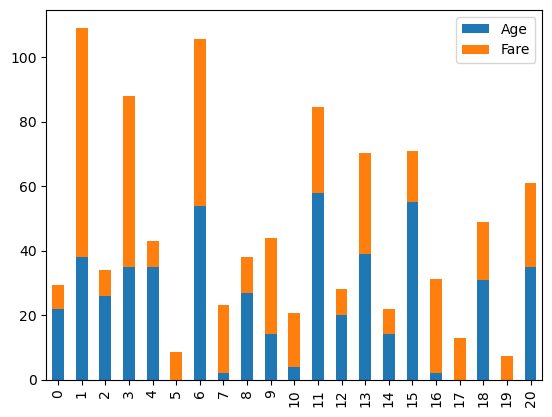

In [123]:
df.loc[:20, ["Age", "Fare"]].plot.bar(stacked=True)

<Axes: xlabel='Age', ylabel='Fare'>

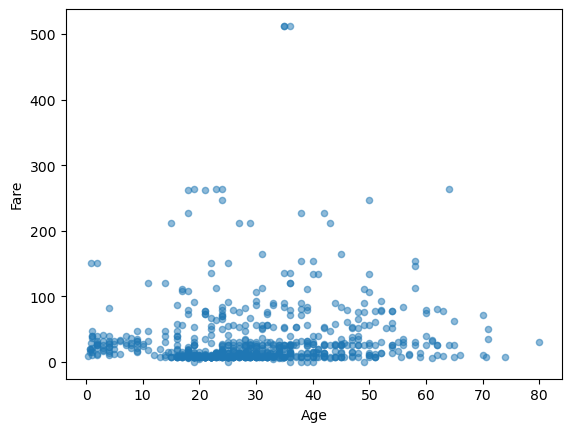

In [124]:
df.plot.scatter(x="Age", y="Fare", alpha=0.5)

more information on plotting can be found here:  
https://pandas.pydata.org/docs/user_guide/visualization.html


## Credits

- https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html
- https://www.practicaldatascience.org/notebooks/class_3/week_2/00_intro_to_pandas.html
- https://www.tomasbeuzen.com/python-programming-for-data-science/chapters/chapter7-pandas.html
- https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks_v1/03.00-Introduction-to-Pandas.ipynb
- https://www.kdnuggets.com/2020/11/dataframe-manipulation-explained-visualized.html
